In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [32]:
data = np.load('em_sim.npy')
data = data.T

time_vec = np.linspace(0, 1000, int((1000)/0.01))

In [33]:
data.shape

(100, 100000)

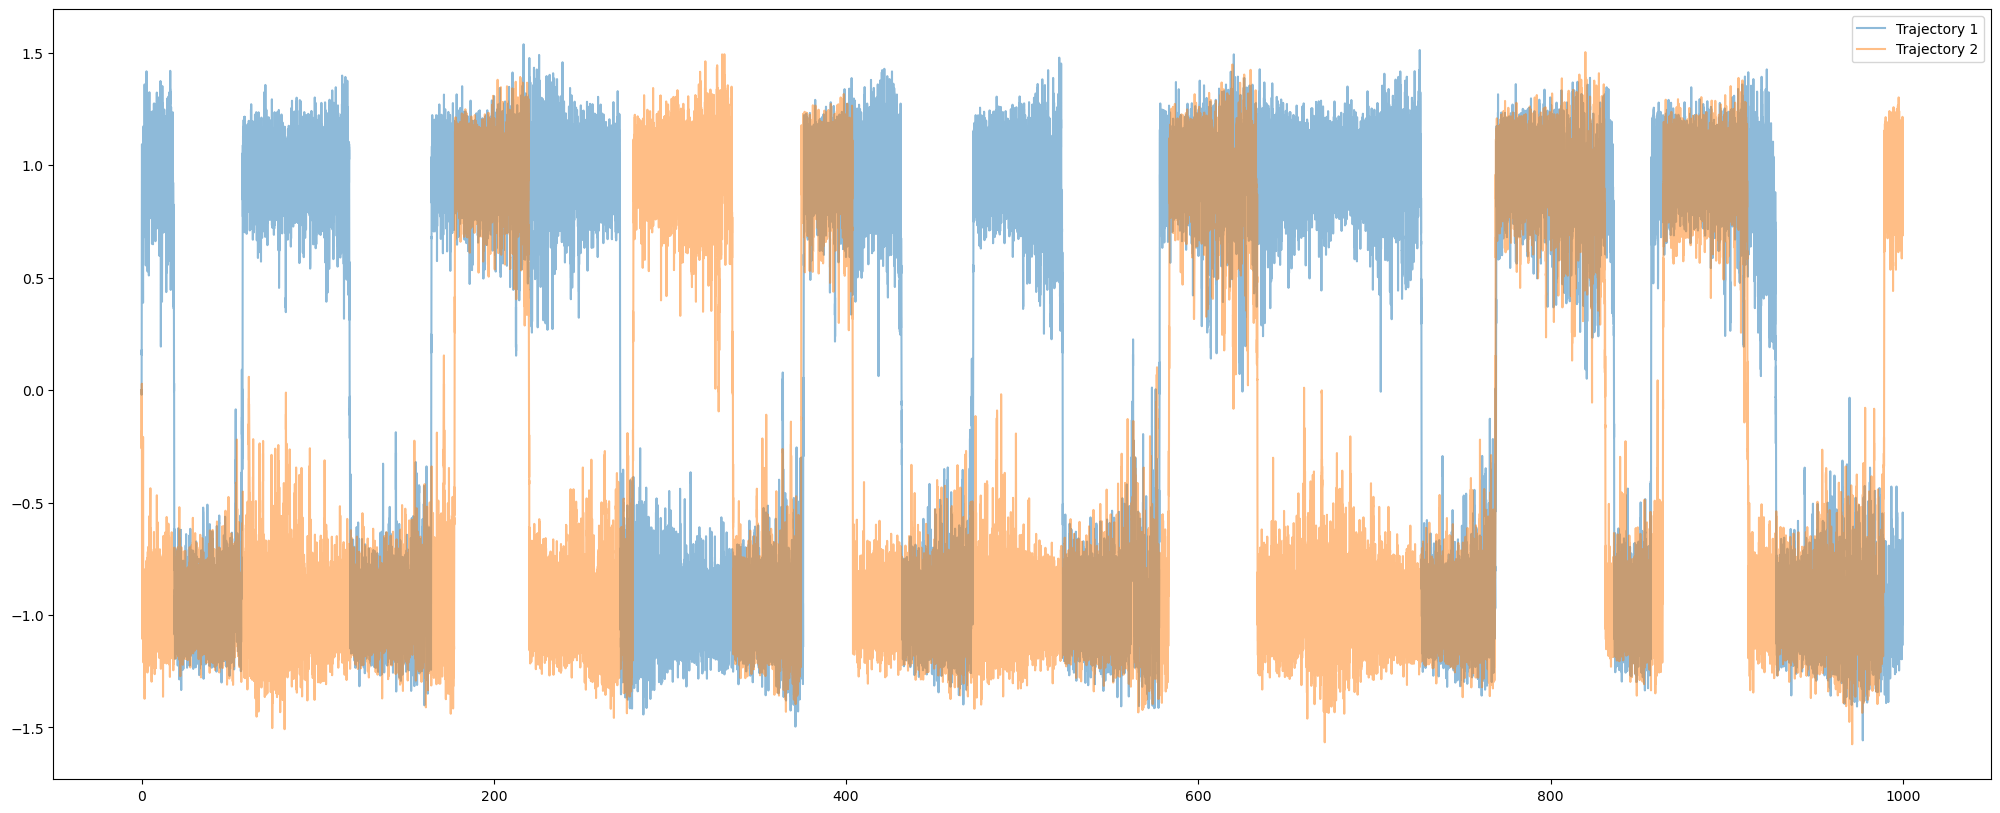

In [53]:
figure = plt.figure(figsize=(25, 10))
trajectory_plots = 2
for i in range(trajectory_plots):
    plt.plot(time_vec, data[i], alpha=1.0/trajectory_plots, label=f"Trajectory {i+1}")

plt.legend()
plt.show()

In [66]:
d1 = data[0]

In [67]:
pos_well, neg_well = [d1 >= 0], [d1 < 0]